# LiveOcean

### IPython Notebook for 'Live Ocean' chapter
For "Cloud computing in ocean and atmosphere science" 
Tiffany Vance (NOAA), Editor

This python section is not part of the chapter proper (see 'Chapter' below).
It illustrates the LiveOcean interface.

### LiveOcean interface
LiveOcean has a simple (5-command) API and we'd like to explore that from an iPython Notebook perspective

In [1]:
import numpy
import scipy
import json
import urlparse
import requests
from IPython.display import Image

figureUrl = "http://robfatland.net/old/LiveOceanFigures/"

In [3]:
# This line is a mode setting that retains graphics inline. 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Simple access to the API 'get-overlay' API call; which returns not JSON but a greyscale png

In [4]:
a=raw_input()
print a

3
3


In [5]:
i = Image(url='http://liveocean.azurewebsites.net/api/get-overlay?date=2015-05-21T22:00:00Z&depthIndex=39&param=salt')
i

### This section implements four (really three) API calls

The code uses the python 'requests' Library. Typically two or three lines of code per API call. 

get-info returns a JSON object, i.e. a List of Dictionaries (unordered key:value pairs)

This example translates: getinfo <unicode> string > List > Dictionaries > a selected value (PartitionKey) from each Dictionary

get-overlay returns a PNG image

get-value is translated: string > List > Dictionaries > 2D numpy array

get-coords gets the coordinates of all the map-plane coordinates. However it is (Kilroy) up on blocks at the moment: It does not work due to a code bug.

In [6]:
# Establish the api base URL and the first call, 'get-info' that tells what data are available
baseUrl = "http://liveocean.azurewebsites.net/api/"
requestcall = "get-info"

apiReply = requests.get(urlparse.urljoin(baseUrl, requestcall))
print 'Call =', apiReply.url, '; reply status is', apiReply.ok, '; status code is', apiReply.status_code, '\n'

# convert this reply to json and print some diagnostics
rjson = apiReply.json()
print 'jsonized get-info reply is of', type(rjson), '; length', len(rjson), '; PKeys (unicode) are', 
print [element['PartitionKey'] for element in rjson]

# Here the unicode u'xxxx' is encoded as ascii to make the PartitionKey list easier to read
pk=[]
for i in range(0,len(rjson)):
        pk.append(rjson[i]['PartitionKey'].encode('ascii','ignore'))
print ""
print 'As ascii:',pk,'\n'

Call = http://liveocean.azurewebsites.net/api/get-info ; reply status is True ; status code is 200 

jsonized get-info reply is of <type 'list'> ; length 3 ; PKeys (unicode) are [u'rho', u'salt', u'temp']

As ascii: ['rho', 'salt', 'temp'] 



http://liveocean.azurewebsites.net/api/get-overlay?date=2015-05-21T22%3A00%3A00Z&depthIndex=39&param=salt True
<type 'str'>


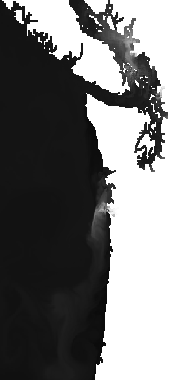

In [7]:
# We move on to the get-overlay call hoping to receive a PNG image
requestcall = "get-overlay"
data_args = {'date':'2015-05-21T22:00:00Z', 'depthIndex':39, 'param':'salt'}
apiReply = requests.get(urlparse.urljoin(baseUrl, requestcall), params=data_args)
print apiReply.url, apiReply.ok

# Assign the content field of the reply 'r' (a string) to an image 'i'
i = Image(data=apiReply.content)
print type(apiReply.content)
i

In [8]:
# get-coords is currently broken
requestcall = "get-coords"
data_args = {'date':'2015-05-10T22:00:00Z', 'depthIndex':39, 'param':'salt'}
apiReply = requests.get(urlparse.urljoin(baseUrl, requestcall), params=data_args)

# Kilroy there is a bug in LiveOceanServer: It still expects a time in hours; needs to be updated to a date.
# Kilroy also would be good to review why get-coords needs to pass a date!
# print r

# getcoordsDictionary = json.loads(getcoords)
# print len(getcoordsDictionary)
# print ""
# print getcoordsDictionary


In [6]:
# We move on now to the get-value api call: JSON format, contents are data (in this case salinity at 10 meters depth)
baseUrl = "http://liveocean.azurewebsites.net/api/"
requestcall = "get-value"
data_args = {'date':'2015-08-24T20:00:00Z', 'depthMeters':'-10.0','param':'salt'}
apiReply = requests.get(urlparse.urljoin(baseUrl, requestcall), params=data_args)

print 'Call =', apiReply.url 
print 'Reply status is', apiReply.ok
print 'Status code is', apiReply.status_code, '\n'

# convert response to json
jsonReply = apiReply.json()
print 'jsonized get-value reply is of', type(jsonReply), '; length', len(jsonReply)

# pull out the dictionary entries, 'min', 'max' and 'data'
minValue = jsonReply['min']
maxValue = jsonReply['max']
print 'minValue is of', type(minValue), 'with value', minValue
print 'maxValue is of', type(maxValue), 'with value', maxValue
print ""
print ""
data=jsonReply['data']
print 'The data entry of this dictionary is of', type(data)

# Determine the dimensions of the data List-of-Lists
numLists = len(data)
numElementsPerList = len(data[0])
print 'API getvalue provides', numLists, 'lists each with', numElementsPerList, 'elements','\n'

# Print a couple of exemplars, one from the water and one from the masked-out land
print 'element 341 of list 131, data[130][340], is',data[130][340],'which is ',type(data[130][340]),'\n'
print 'element 381 of list 174, data[173][380], is',data[173][380],'which is ',type(data[173][380]),'\n'

# Count the number of float values and 'Nones' to ensure they sum to the total grid cell count
nFloat = 0
nNone = 0
for s in data:
    for t in s:
        if (isinstance(t,float)):
            nFloat += 1
        else:
            nNone += 1
        
print 'floats:',nFloat,'and Nones:',nNone, 'sum is',nFloat+nNone,'and area is',numLists*numElementsPerList
print ""

if nFloat + nNone != numLists*numElementsPerList:
    print ""
    print "data check finds a discrepancy between expected types and grid area."
    print ""
    print "Kilroy: SERIOUS PROBLEM, data field is not self-consistent"
    print ""
    print ""
else:
    print ""
    print "data check shows data[][] is self-consistent"
    print ""

Call = http://liveocean.azurewebsites.net/api/get-value?date=2015-08-24T20%3A00%3A00Z&depthMeters=-10.0&param=salt
Reply status is True
Status code is 200 

jsonized get-value reply is of <type 'dict'> ; length 3
minValue is of <type 'float'> with value 0.0
maxValue is of <type 'float'> with value 9.99999993382e+36


The data entry of this dictionary is of <type 'list'>
API getvalue provides 174 lists each with 381 elements 

element 341 of list 131, data[130][340], is 28.4209952047 which is  <type 'float'> 

element 381 of list 174, data[173][380], is None which is  <type 'NoneType'> 

floats: 36284 and Nones: 30010 sum is 66294 and area is 66294


data check shows data[][] is self-consistent



# Live Ocean

Authors Rob Fatland, Parker MacCready, Nels Oscar

### Abstract

This chapter describes LiveOcean, a project to help mitigate the financial impact of ocean acidification on the 
marine food industry in the Pacific Northwest of the United States. Underlying the practical details of building this 
system on the Microsoft Azure cloud platform are a number of design considerations addressing recurring themes in the 
deployment of modest-scale scientific data management systems. The most important of these is modularity: 
Building systems 
incrementally from independent components with minimal interdependence. This approach prioritizes 
function and helps avoid over-taxing development 
resources. It also enables a desirable outcome: The unanticipated use of forecast information.    

In [11]:
logoImage = Image(url=figureUrl + 'LiveOceanLogoMedium.png')
logoImage

### Introduction

LiveOcean is a hybrid-technology solution for producing and conveying 
ocean state forecasts as actionable information to the marine industry. 
This chapter describes the LiveOcean 
solution in terms of technical components, project motivation from ocean acidification [1], 
scenarios for data use, forecast validation, and extension of 
the project through community growth and emerging cloud technology. 

LiveOcean (LO) represents a bridging project, one that originates strictly from the research domain of physical 
oceanography that then bridges across to practical use: Initially intended for shellfish farming with 
applicability to other 
commercial fisheries. 

LiveOcean originated from a study commissioned by the state of Washington, USA, under the driving question: 
What are top economic implications of ocean acidification in the commercial 
fisheries? The study was conducted from Kilroy to Kilroy by the Kilroy council that has a Kilroy relationship 
to WOAC and Kilroy other organizations. The study produced five recommendations (Kilroy) and the resulting 
RFP was successfully answered by Parker MacCready, professor of oceanography at the University of Washington.

LO has proceeded as three parallel efforts: Operationalizing the ROMS model, building the LiveOcean Server cloud 
middleware, and producing Client views of the forecast data. This third component proceeds from the LO design 
emphasis on decoupling the physical model from the use of the forecast data.


### LiveOcean technical components

##### ROMS model forecast generation

LiveOcean is based upon the modeling capabilities of the Regional Ocean Modeling 
System (ROMS) adapted to the coastal waters off of Washington, Oregon and British Columbia. 
The following figure shows the extent of the ROMS forecast superimposed on a bing map
with salinity color coded from orange-brown to white (fresh water). 

In [13]:
roiBing = Image(url=figureUrl + 'region of interest bing maps overlay surface salinity orange colormap.png')
roiBing

##### Live ocean data structure

A ROMS model run is built on a set of initial conditions:

1. River forecasts for 16 rivers from NOAA [Kilroy-1] or USGS with infill from climatological data. 
Discharge from other (ungauged) rivers is estimated from past studies. 

2. Open ocean conditions from HYCOM, 
sponsored by the National Oceanographic Partnership Program (NOPP) [Kilroy-2, Kilroy-3]

    
3. Current high-resolution atmospheric fields from WRF simulations by Cliff Mass' group at UW.

4. Tidal forcing for each day from maps of global tidal phase and amplitude generated at OSU. 

5. Initial ocean state is taken from a prior run of the ROMS model.

From these initial conditions the ROMS model produces an hourly forecast of ocean conditions 
for the ensuing 72 hours. This forecast is analogous to a weather forecast; but it 
extends from the ocean surface down to the sea floor across the region of interest (ROI). 
This region extends from The ROMS model has been developed and validated over 
the course of two decades [2, 3, 4, 5, 6].

ROMS is a computational fluid dynamics model tailored to the ocean waters west 
off the Pacific Northwest in the US.  
A ROMS run produces a dataset representing hour-by-hour volumetric water state
across approximately 20 scalar parameters including temperature, 
salinity, pH, aragonite saturation, dissolved oxygen, phytoplankton, 
zooplankton, and detritus; as well as the ocean current vector field.


ROMS runs on a 100-core HPC cluster to produce (72) hourly NetCDF files 
representing water conditions at 40 stratified layers across ~ 200 x 400 map-plane 
cells covering a rectangular region from Kilroy latitude to latitude and Kilroy longitude 
to longitude. The resulting Kilroy square kilometers region off the coast of Washington state (USA) 
results in individual grid 
cells approximately Kilroy x Kilroy kilometers. Map-plane grid spaceing is not even: Finer 
resolution is used in proximity to the coast to better support complex fluid flow in those areas.


The vertical stratification of each map-plane cell is fixed in proportion to mean water depth 
for that cell.  Due to ocean bathymetry therefore the cells are not vertically aligned from 
one map plane column to another. The cells are more finely spaced near the surface and near 
the sea bed; and an algorithm is provided for converting between (cell index plus bathymetry) 
and physical depth. The ROMS data structure, thus, is driven by a compromise between precision 
and computing power.


The ROMS output (72 NetCDF files) is not readily consumed by the Live Ocean audience. 
This suggests a translational layer that we describe below as cloud middleware built using 
a modular design approach.



##### Live Ocean cloud middleware

LiveOcean cloud middleware acts to translate forecast data into consumable information by means of 
an Applications Programming Interface (API) described below. This approach modularizes the task of
disseminating information and can be contrasted with the more common 'website/portal' approach. In the
latter case the research group will design, build and maintain a website -- often called a data portal --
that is intended to anticipate the end-user's information needs. While such data portals may solve the
task of data dissemination they are at risk of several common pitfalls. Kilroy should elaborate some of these: 
Data becomes stale, website breaks, researchers tire of maintaining the site (as with SciScope), it
can be difficult to update the data as new data arrives, and most importantly data recovery is a manual
process which is tedious and time-consuming for each transaction. 


The API approach separates the data forecast process from the consumer's approach to forecast information.
This is accomplished by means of a (conceivably large) set of information Clients, described in detail below, 
that use the API to appropriate only information of interest.

In [16]:
# On the map plane we have 174 x 381 cells
# Vertically the ROMS model runs 40 cells
# There are about 20 different types of scalar data
# There is a current vector field which is 3 values per cell
# That's roughly 23 scalar values per cell for one instant in time
# There are 72 hours in one forecast
volumeCells = 174 * 381 * 40
dataTypes = 23
dataSnapshot = volumeCells * dataTypes
numberOfHours = 72
dataPerForecast = dataSnapshot * numberOfHours
print 'There are', cells, 'model volume cells and', dataTypes, 'scalar data values.'
print 'There are', dataSnapshot, 'data values per time slice and', numberOfHours, 'time slices per forecast.'
print 'There are', dataPerForecast, 'data values per forecast.'
print ""


There are 2651760 model volume cells and 23 scalar data values.
There are 60990480 data values per time slice and 72 time slices per forecast.
There are 4391314560 data values per forecast.



A time-series of one parameter (say aragonite saturation) at one location (say surface waters near 
a shellfish farm in Willapa Bay) represent 0.0000016 percent of the total forecast information.


Once data dissemination is supported in a procedural sense a second task is to reduce the latency
of query replies. That is: A response to a typical API query should take a 'human-unnoticeable' amount of time. LiveOcean uses cache generation (stockpiling these typical results) 
to reduce query latency. This process is initiated as soon as a new forecast arrives in cloud storage
and typically takes less than one hour to complete, comparable to the time necessary to generate the forecast
results. This approach to caching results could be modified to an adaptive scheme (based on 
prior query patterns) or to a comprehensive 'cache almost everything conceivable' scheme.

Another important feature of the LiveOcean cloud middleware is to provide administrative oversight 
and information for Developers who would like to understand and use the API. These features are
provided by means of a LiveOcean administrative website (http://liveocean.azurewebsites.net).
This website includes API documentation, working API examples, 
reports on ROMS model run history (success/fail status on component tasks), 
and other state-of-health system information.

##### Live Ocean Clients

As described below Live Ocean is built on a modular design principle: Build system components
as needed and minimize dependencies between those components. 

Define a Client.

Define the undefined nature of the LiveOcean target (information consumer) community. Such info-consumers
would like customized applications that provide only certain types of information gleaned from 
the LO forecasts. 

LiveOcean Clients can consequently be seen as after-market efforts (though where some examples Clients
are already built) that enable the Consumer to receive only the information they are interested in. 
A strong example would be a LiveOcean Client onboard a fishing vessel. The Client actually begins in 
the cloud where each day it polls LiveOcean to note the arrival of the day's 3-day forecast. 
It then pulls in the necessary data (suppose these are ocean temperature, salinity, pH and chlorophyll
forecasts) and arrives at a forecast optimal fishing location within 80 kilometers of 
Astoria Oregon. These coordinates are transmitted via VHF white space to fishing vessels already
at sea. The optimal location appears as a symbol on a chart plotter.

The current examples of LiveOcean Clients include a web browser "data explorer" interface where the
forecast can be shown and adjusted as a bing map overlay with time-series animated playback. 
This overlay includes transparent pixels where no data is present (land) and can be adusted in opacity 
with respect to the bing map. 

A second LiveOcean Client connects LiveOcean forecast data to a visualization engine called Worldwide 
Telescope with support for four/five/six dimensions of data.

A third LiveOcean Client is an iPython Notebook (this). 

##### LiveOcean modular design

In the research context the ROMS model is a tool for studying the physical ocean, an end in itself. LiveOcean will carry ROMS model results to a new endpoint: Maritime commercial operations. Hence there is a natural break between a ROMS forecast and the dissemination (consumption) of those results. Commonly a forecast is communicated via website, for example using a map tool supporting layers and overlays that runs in a web browser. In the LiveOcean project we modularize this process into two components: Middleware and Client. The Middleware is responsible for providing a data service according to ease-of-use principles. The Client is software that acts on behalf of the information consumer, for example an app used by a shellfish grower. This person is presumed interested in only a small subset of the ROMS model output:  Aragonite saturation forecast only at the company's oyster beds for the next three days. This person might also be remote with limited (cell phone or VHF) connectivity. This shellfish grower represents only one of potentially dozens of different forecast consumers. LiveOcean if successful therefore has a one-to-many relationsihp. By adopting a modular approach for LiveOcean we address two aspects of this relationship: The information consumption is easily tailored; and the interpretation of the forecast information is not proscribed.

The LiveOcean middleware -- the translational layer between the ROMS model output and the Client -- provides data according to three three principles: The query-response mechanism is simple and well-documented, the data are simple and readily understood and the response latency is minimal.  This middleware called Live Ocean Server is implemented in the Python programming language using the Django Web Application Framework. The software was developed in the Microsoft Visual Studio programming environment and deployed to the Microsoft Azure cloud. Hence LiveOcean as a solution represents a synthesis of four technologies: Python, Django, Visual Studio and Azure.

The notion of modularity extends further: Suppose that a need develops for LiveOcean forecast data in a different format such as a Web Mapping Service. Such a service could be built on an as-needed basis; but a more compelling example follows. Because the LiveOcean forecast includes ocean current information the query-response engine could be extended both forward and backward in time. 'Where did the water at this location come from?', 'Where will the water at this location go?' Common phenomena such as Harmful Algal Blooms (HABs) and nutrient upwelling along the continental shelf have important consequences in the relationship between coastal ecosystems and there people who live there. If LiveOcean proves adept at forecasting these events their translation to common use can be implemented as a modular addition to the existing system. Virtually all of these -- including sophisticated machine learning pattern search analysis -- can be implemented as cloud services that operate on the accumulation of ROMS model output data. 

##### LiveOcean Application Programming Interface (API)

The LiveOcean Application Progamming Interface (API) is a computer-to-computer interface for Clients to query 
the LiveOcean middleware. A query is in the form of a base URL with text appended, technically an HTTP POST 
operation. There is no authentication required and the interface is technically state-less and RESTful. 
As a consequence there are essentially two things necessary for a succesful Client-LiveOcean 
interaction: 
The Client must correctly format encode a query in the URL; 
and the Client must correctly parse the returned data. 


The API vocabulary consists of five terms


1. get-info provides information on what information is currently available from LiveOcean (JSON)
2. get-cmap provides a color map for rendering overlay images (JSON)
3. get-coords provides the coordinate grid of the LiveOcean map space (JSON)
4. get-value provides a map space sheet of floating point values (JSON)
5. get-overlay provides a greyscale image of parameter/time/depth (PNG)


There are in some cases appended qualifiers.

1. A parameter choice: 'salt' for salinity, etc)
2. A date in Kilroy format. 
3. A depth, either as model index or as a negative-valued depth in meters.


The following is an example URL that acts as a LiveOcean API call: 
    
    
http://liveocean.azurewebsites.net/api/get-value?date=2015-05-28T22%3A00%3A00Z&depthMeters=-10.0&param=salt
    

The reply is a block of text in JSON format. This text is a dictionary with three entries: 
max, min and data. 
'max' and 'min' correspond to floating point values defining the allowed range of the data. 
'data' corresponds to a two-dimensional array of floating point salinity values for the ocean cells
at a depth of 10 meters for May 28, 2015 at 2200 hours (Kilroy translate this to Zulu and local).
Non-ocean cells in this array have salinity value 'null'. 


Kilroy it might not be a bad idea to include the start ... end JSON, as in: 
    
{"max": 9.999999933815813e+36, "data": [[32.611933759253205, 32.61435865545276, 32.612672487696415, 
32.60984667780757, 32.605664831389426, 32.595485402144654, ... null, null]], "min" : 0.0 }


### LiveOcean Project Motivation

The report providing motivation for Live Ocean is entitled 
'Ocean acidification: From knowledge to action, Washington's strategic response' [1]. From this report:


"Today’s ocean acidification is important not only for the amount of change that has
occurred thus far but also for how quickly it is happening. The current rate of acidification
is nearly ten times faster than any time in the past 50 million years, outpacing
the ocean’s capacity to restore oceanic pH and carbonate chemistry. The rapid pace of
change also gives marine organisms, marine ecosystems, and humans less time to adapt,
evolve, or otherwise adjust to the changing circumstances. At the current rate of global
carbon dioxide emissions, the average acidity of the surface ocean is expected to increase
by 100–150 percent over pre-industrial levels by the end of this century. [...]

More than 30 percent of Puget Sound’s marine species are [directly] vulnerable to
ocean acidification by virtue of their dependency on the mineral calcium
carbonate to make shells, skeletons, and other hard body parts. Puget
Sound calcifiers include oysters, clams, scallops, mussels, abalone, crabs,
geoducks, barnacles, sea urchins, sand dollars, sea stars, and sea cucumbers.
Even some seaweeds produce calcium carbonate structures."


The implications of this study for the marine industry are both direct and indirect. 
Directly the acidification of the ocean has a uniformly deleterious impact on calcifiers.
Indirectly the impact on those calcifiers in turn affects the entire marine food web. 






### Scenarios for data use

##### LiveOcean data use in forecast time scales

This describes the expected use 

##### LiveOcean data use in year-over-year time scales

Suppose the initial positive validation results for the ROMS model hold up in future studies 
as LiveOcean becomes operational, including hindcast re-analysis. 
The implication of this result will be that the forecast data represents the actual state of
the ocean at some confidence level. After LiveOcean has produced such results for an 
extended period of time (months to years) a new opportunity will emerge for longitudinal analysis.


One example is the analysis of coastal upwelling: Does the LiveOcean forecast record suggest 
seasonal patterns of nutrient supply to the coastal / shelf waters of the region of interest? 
Does this upwelling signal correlate with trends in marine coastal ecology? 
Does it correlate with independent high trophic level data such
as industrial fisheries catch records.


LiveOcean circulation results represent physical ocean transport and extend to plankton estimates.
Plankton are defined to be living creatures that do not overcome prevailing currents with their
own motility and can therefore be taken as 'swept along in physical water mass'. A fascinating
potential consequence of an accurate LiveOcean forecast is the implication for higher trophic
levels above those of plankton. For example a carnivorous and highly mobile fish such as a salmon
can sample and respond to gradients in prey density which in turn will have dependencies along
the trophic chain down to plankton. Will LiveOcean forecasts be accurate enough to see and even
predict distributions of high trophic level predators? 

In [17]:
marineTrophic = Image(url = figureUrl + 'marine trophic level diagram placeholder.png')
marineTrophic

The following figure was produced as a simple dynamic visualization of hypothetical whale paths grazing along maximum local gradients in the LiveOcean surface zooplankton estimate over 72 hours. 
The zooplankton concentration is rendered as a greyscale overlay where the fuzziness in the near-field
image over land reflects the model resolution, 174 by 381 map-plane cells across the region of interest. 

In [18]:
whaleExample = Image(url= figureUrl + 'LiveOcean zooplankton whale simple example.png')
whaleExample

### LiveOcean Validation

##### Past work

ROMS has been validated primarily against mooring data and CTD station casts (pre-established consistent
locations where a research vessel will measure conductivity, temperature and depth profiles from the 
surface to the sea floor).  Both mooring locations and CTD stations are shown in the
following figure in relation to the LiveOcean forecast region. 


 

In [19]:
roiValidation = Image(url= figureUrl + 'region of interest with validation moorings indicated.png')
roiValidation

In [20]:
validationGraph = Image(url= figureUrl + 'ROMS model validation from Siedlecki.png')
validationGraph

##### Future validation

ROMS validation against moorings should and will continue as a matter of course.
Of considerable interest will be validation against other data resources: 
CTD casts from research cruises, 
ARGO data, 
glider data, etc). This independent verification of ROMS model output could be 
done from dedicated resources; but it could also be done opportunistically provided
that those data are openly available.


One of the most important tests of ROMS and LiveOcean will be in the prediction 
of harmful algal blooms. A successful series of such predictions would be an
important step in establishing public trust of the LiveOcean proposition. 


The significance of LiveOcean is yet to be realized. If it is successfully validated 
in terms of physical oceanography one obvious implication will be: Can LiveOcean 
reliably provide higher-level or derived information to the marine industry? 

### Project Extensions

LiveOcean could provide tide data. It could provide turbulence estimates; upwelling; other driving condition data. Ocean current forecasts.

Very important: LiveOcean could provide an API call that says "Where did the water at this location come from?" as well as "Where will the water at this location go?" 

##### Added value: New client paths

Kilroy deconstruct this section. It is about Client paths, not information value; so either
describe this topic as both or merge the information value into the section up above. 


Reference to begin: Above we described a LiveOcean result arriving on the chart plotter of a fishing vessel.
    
    
This is straightforward technology but it is not yet clear to me if it has been implemented yet. I do know that
there is some provision for ship-to-shore phone calls that span communication types... so a little more work 
making this make sense is necessary. 


Here provide at least three other examples of customized Clients: 
    
1. Pass through the initial conditions for a favorite beach: to the Band on the 
wrist of a surfer; include "HAB risk: Low"

2. Provide From/To: On a tablet app, map with clock, the person taps a location 
and a time and asks "Where will this water go in the next 3 days?" For example to help
predict the spread and extent of an oil spill. 

3. Ferry outreach kiosk.

Further important ideas: 

LiveOcean could provide tide data. It could provide turbulence estimates; upwelling; 
other driving condition data. Ocean current forecasts. Kilroy see note above (this section). 


##### Added value: advanced cloud services

This section describes Microsoft Azure cloud services that are rapidly evolving. 
It should include a python example; but the real value would circumvent coding and simply
create a cloud agent that constantly filters the results of the forecast for HABs and so forth. 
This is then recapitulated in the Conclusions. 

##### Added value: Use for other forecast types

An important consequence of the modular design of LiveOcean is perceptual: The project can be understood
as a template for other forecast systems. In 2014 LiveOcean middleware (i.e. excluding the ROMS model) was adapted 
by Anthony Arendt into 'Ice2Ocean', a system for forecasting river discharge from glaciated watersheds along the 
southern coast of Alaska.

    

### Conclusions

The role of scientific models such as ROMS in predictive forecasts is at developing as a necessity. 
It is also intrinsically perilous to transition from the careful world of scientific inquiry into
the operational world of marine fisheries. Fluid dynamics is fraught with uncertainty 
and error when 
rendered as finite grid cells in software. Scientists are comfortable with this uncertainty
and care must be taken to create an understanding of 'caveat emptor' when the data are applied to
real-world real-time decisions. 

The notion of 'cloud' is an evolving idea both in terms of perception and in terms of the services
that the cloud can provide. In this chapter we have described three progressive cloud services that
span the transition between data source (the ROMS model running on a non-cloud high-performance compute
cluster) and the information consumer. These cloud services are, in order of sophistication: 
First a 'landing place' for the forecast data in native NetCDF format. 
Second a translational Applications Programming Interface (API)
that supports Clients owned and operated by the consumer community 
(cell phone applications, web
browsers, chart plotters, VHF radios, etcetera).
Third -- and particular to our case study on the Microsoft Azure cloud platform -- 
sophisticated analysis services that continuously scan the forecast data
for patterns of meaning such as health threats (harmful algal blooms) or 
optimal fishing conditions that could shorten fishing seasons and thereby help recover fish stocks.

### References

1. Ocean Acidification: From Knowledge to Action, Washington State’s Strategic Response. 
https://fortress.wa.gov/ecy/publications/SummaryPages/1201015.html. 
Blue ribbon panel (authors) website: http://www.ecy.wa.gov/water/marine/oa/panel.html.

2. MacCready, Parker, et al. "A model study of tide-and wind-induced mixing in the Columbia River Estuary and plume." Continental Shelf Research 29.1 (2009): 278-291.

3. Liu, Yonggang, et al. "Evaluation of a coastal ocean circulation model for the Columbia River plume in summer 2004." Journal of Geophysical Research: Oceans (1978–2012) 114.C2 (2009).

4. Sutherland, David A., et al. "A Model Study of the Salish Sea Estuarine Circulation*." Journal of Physical Oceanography 41.6 (2011): 1125-1143.

5. Geyer, W. Rockwell, and Parker MacCready. "The estuarine circulation." Annual Review of Fluid Mechanics 46.1 (2014): 175.
    
6. Siedlecki, S. A., et al. 
"Seasonal and interannual oxygen variability on the Washington and Oregon continental shelves." 
Journal of Geophysical Research: Oceans (2014).

Ref Kilroy-1: river discharge from NOAA: http://www.nwrfc.noaa.gov/rfc/

Ref Kilroy-2: HYCOM http://hycom.org/data/glbu0pt08/expt-91pt1

Ref Kilroy-3: NOPP http://www.nopp.org/